In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.data import generate_df_from_list
from src.analysis import compute_correlations, compute_correlations_in_time

plt.style.use('seaborn-v0_8-dark')

# Download data
Download data from Yahoo finance using their API

In [2]:
df = generate_df_from_list(list_etf = ['BTC-USD', '^GSPC'],
                           starting_time = '2010-01-01')

df

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.




*********************100%%**********************]  1 of 1 completed

,BTC-USD,^GSPC
Date,,
2014-09-17,457.334015,2001.569946
2014-09-18,424.440002,2011.359985
2014-09-19,394.795990,2010.400024
2014-09-22,402.152008,1994.290039
2014-09-23,435.790985,1982.770020
...,...,...
2024-12-03,96002.164062,6049.879883
2024-12-04,98768.531250,6086.490234
2024-12-05,96593.570312,6075.109863


# Correlation analysis
Perform correlation analysis for different time windows and different periods

In [3]:
df1 = df[(df.index > '2014-01-01') & (df.index <= '2016-12-31')]
time_grid14, corr_grid14 = compute_correlations_in_time(df1, time_grid=np.arange(1, 252*2, 5))

df2 = df[(df.index > '2017-01-01') & (df.index <= '2019-12-31')]
time_grid17, corr_grid17 = compute_correlations_in_time(df2, time_grid=np.arange(1, 252*2, 5))

df3 = df[df.index > '2020-01-01']
time_grid20, corr_grid20 = compute_correlations_in_time(df3, time_grid=np.arange(1, 252*2, 5))




00%|█████████████████████████████████████████| 101/101 [00:40<00:00,  2.51it/s]

In [4]:
avg_corrs = [np.mean(corr_grid14), np.mean(corr_grid17), np.mean(corr_grid20)]
corr_grid_time = ['2014-2016', '2017-2019', '2020-2024']

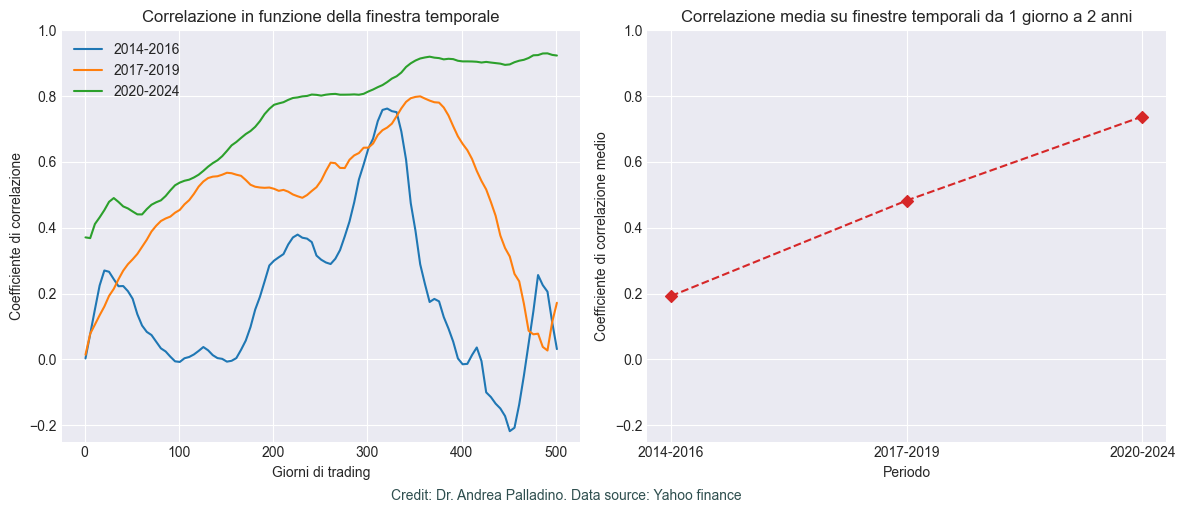

In [9]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time_grid14, corr_grid14, label='2014-2016')
plt.plot(time_grid17, corr_grid17, label='2017-2019')
plt.plot(time_grid20, corr_grid20, label='2020-2024')
plt.title('Correlazione in funzione della finestra temporale')
plt.grid()
plt.xlabel('Giorni di trading')
plt.ylabel('Coefficiente di correlazione')
plt.ylim(-0.25, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(corr_grid_time, avg_corrs, marker='D', color='C3')
plt.plot(corr_grid_time, avg_corrs, linestyle='--', color='C3')
plt.title('Correlazione media su finestre temporali da 1 giorno a 2 anni')
plt.grid()
plt.xlabel('Periodo')
plt.ylabel('Coefficiente di correlazione medio')
plt.ylim(-0.25, 1)

fig.text(0.33, -0.01, 'Credit: Dr. Andrea Palladino. Data source: Yahoo finance', color='darkslategrey')
plt.tight_layout()
plt.savefig('results/plot-corr.png', dpi=300, bbox_inches="tight")
plt.show()

# Bear market analysis

In [6]:
sub_df1 = df[(df.index>'2020-01-01') & (df.index<='2020-12-31')]
min_values = sub_df1.min()
max_values = sub_df1.max()

lost_2020 = 100*(min_values - max_values)/max_values
print('% Lost during Covid bear market of 2020')
print(lost_2020)

% Lost during Covid bear market of 2020
BTC-USD   -82.860368
^GSPC     -40.432424
dtype: float64


In [7]:
sub_df1 = df[(df.index>'2022-01-01') & (df.index<='2022-12-31')]
min_values = sub_df1.min()
max_values = sub_df1.max()

lost_2022 = 100*(min_values - max_values)/max_values
print('% Lost during war bear market of 2022')
print(lost_2022)

% Lost during war bear market of 2022
BTC-USD   -66.739616
^GSPC     -25.425097
dtype: float64
